<a href="https://colab.research.google.com/github/DanielAdif/Machine-Performance-Evaluation/blob/main/Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd. set_option('display.max_rows', 500)

#Sci-kit Learn Library
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron

#Deep Learning Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [2]:
df = pd.read_excel('Book1.xlsx', sheet_name='Obs (2)')
cluster_df = df.set_index('Obs')
cluster_df.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
Obs,,,,,
1,3,2.645751,108,0,1
2,5,1.414214,99,0,1
3,3,1.527525,109,0,1
4,3,1.732051,101,0,1
5,9,3.055050,75,1,1


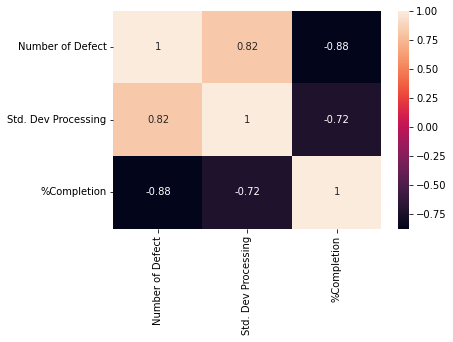

In [3]:
df_corr = cluster_df[['Number of Defect', 'Std. Dev Processing', '%Completion']]
sns.heatmap(df_corr.corr(), annot=True)

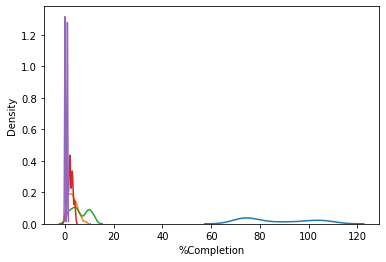

In [4]:
sns.kdeplot(cluster_df['%Completion'])
sns.kdeplot(cluster_df['Std. Dev Processing'])
sns.kdeplot(cluster_df['Number of Defect'])
sns.kdeplot(cluster_df['Defect Type'])
sns.kdeplot(cluster_df['Perfectly Cut'])

In [5]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(cluster_df)
robust_df = pd.DataFrame(robust_df)
robust_df.columns = ['Number of Defect',	'Std. Dev Processing',	'%Completion',	'Perfectly Cut',	'Defect Type']
robust_df.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
0,-0.333333,-0.079321,0.962963,0.0,-0.5
1,0.000000,-0.510549,0.629630,0.0,-0.5
2,-0.333333,-0.470873,1.000000,0.0,-0.5
3,-0.333333,-0.399257,0.703704,0.0,-0.5
4,0.666667,0.063997,-0.259259,1.0,-0.5


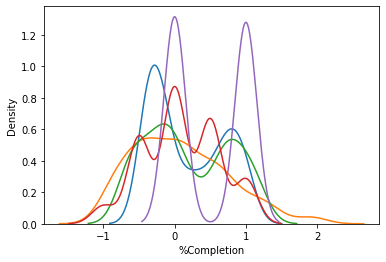

In [6]:
sns.kdeplot(robust_df['%Completion'])
sns.kdeplot(robust_df['Std. Dev Processing'])
sns.kdeplot(robust_df['Number of Defect'])
sns.kdeplot(robust_df['Defect Type'])
sns.kdeplot(robust_df['Perfectly Cut'])

Text(0, 0.5, 'Within-Cluster Sum of Squares')

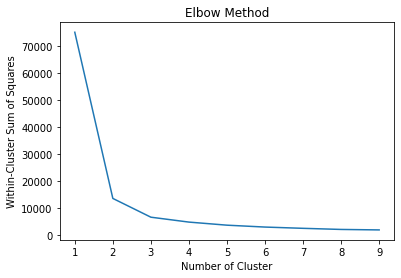

In [7]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(cluster_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Within-Cluster Sum of Squares')

In [8]:
kmeans = KMeans(n_clusters=3)
cluster_df["Cluster"] = kmeans.fit_predict(robust_df)
cluster_df["Cluster"] =cluster_df["Cluster"].astype("category")

cluster_df.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type,Cluster
Obs,,,,,,
1,3,2.645751,108,0,1,1
2,5,1.414214,99,0,1,1
3,3,1.527525,109,0,1,1
4,3,1.732051,101,0,1,1
5,9,3.055050,75,1,1,0


In [9]:
cluster_df['Cluster'].value_counts()

1    186
0    103
2     78
Name: Cluster, dtype: int64

In [10]:
cluster_df.to_excel('Clustered.xlsx')

In [11]:
df_1 = cluster_df.loc[cluster_df['Cluster'] == 1]
df_0 = cluster_df.loc[cluster_df['Cluster'] == 0]
df_2 = cluster_df.loc[cluster_df['Cluster'] == 2]

In [12]:
df_1.describe()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
count,186.000000,186.000000,186.000000,186.0,186.000000
mean,3.053763,1.575069,98.435484,0.0,2.043011
std,1.439712,0.810742,8.649239,0.0,1.007153
min,1.000000,0.006136,80.000000,0.0,0.000000
25%,2.000000,0.923203,91.250000,0.0,1.000000
50%,3.000000,1.553238,101.000000,0.0,2.000000
75%,4.000000,2.247191,105.000000,0.0,3.000000
max,5.000000,2.939854,110.000000,0.0,4.000000


In [13]:
df_2.describe()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
count,78.000000,78.000000,78.000000,78.0,78.000000
mean,10.589744,5.780769,74.153846,1.0,2.961538
std,1.037428,1.232982,2.910246,0.0,0.874491
min,9.000000,3.340421,70.000000,1.0,1.000000
25%,10.000000,4.770300,72.000000,1.0,2.000000
50%,10.000000,5.714286,74.000000,1.0,3.000000
75%,11.750000,6.528921,77.000000,1.0,4.000000
max,12.000000,8.698897,79.000000,1.0,4.000000


In [14]:
df_0.describe()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
count,103.000000,103.000000,103.000000,103.0,103.000000
mean,8.271845,3.815331,75.242718,1.0,1.834951
std,1.931139,0.651920,5.057446,0.0,0.960975
min,5.000000,3.017660,70.000000,1.0,0.000000
25%,6.500000,3.300026,72.000000,1.0,1.000000
50%,9.000000,3.613426,74.000000,1.0,2.000000
75%,9.000000,4.322054,77.500000,1.0,2.000000
max,12.000000,5.701877,99.000000,1.0,4.000000


In [15]:
X = cluster_df.copy()
y = X.pop('Cluster')

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [16]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

Std. Dev Processing    0.884555
%Completion            0.673709
Name: MI Scores, dtype: float64

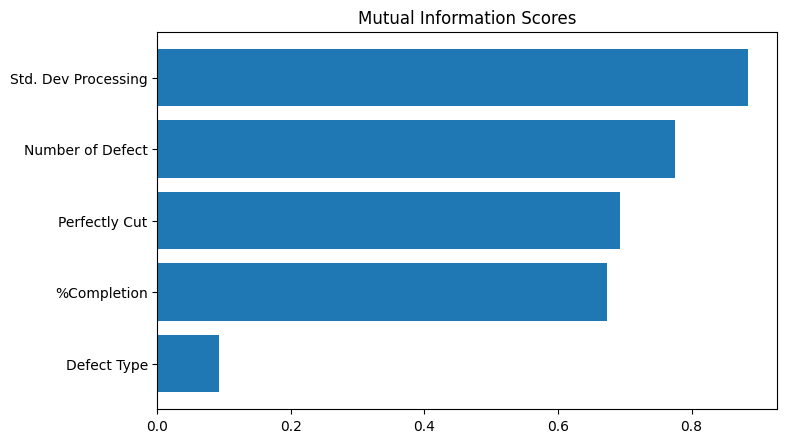

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [18]:
X = robust_df[['Std. Dev Processing', 'Number of Defect', '%Completion']]
y = cluster_df['Cluster']

In [19]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,-0.784431,0.523715,-0.155965
1,-0.709213,-0.099789,-0.273292
2,-1.056769,0.259165,-0.258583
3,-0.869570,0.134193,-0.053014
4,0.481658,-0.427566,-0.075658


In [20]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
Std. Dev Processing,0.650648,0.732282,0.201049
Number of Defect,0.592852,-0.324393,-0.737086
%Completion,-0.474535,0.598776,-0.645201


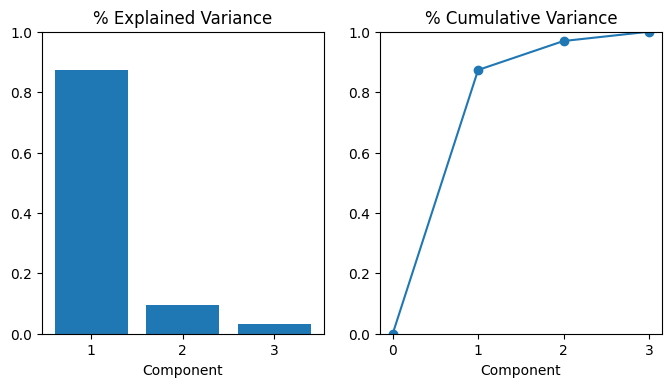

In [21]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

# Look at explained variance
plot_variance(pca);

In [22]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.846919
PC2    0.192433
PC3    0.060699
Name: MI Scores, dtype: float64

In [23]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ['Std. Dev Processing', 'Number of Defect', '%Completion']
print(df.loc[idx, cols].head())
print(df.loc[idx, cols].tail())

     Std. Dev Processing  Number of Defect  %Completion
291             3.948955                 6           70
222             3.613426                 6           70
103             3.773340                 6           71
239             3.752194                 6           71
15              3.271085                 6           70
     Std. Dev Processing  Number of Defect  %Completion
72              4.760400                12           76
80              4.956477                12           77
44              4.295434                12           76
263             4.719053                12           79
175             4.295130                12           78


In [24]:
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = ['Std. Dev Processing', 'Number of Defect', '%Completion']
print(df.loc[idx, cols].head())
print(df.loc[idx, cols].tail())

     Std. Dev Processing  Number of Defect  %Completion
312             8.427101                12           73
161             8.264568                12           72
166             8.463795                12           78
354             8.698897                10           72
188             8.249237                10           71
     Std. Dev Processing  Number of Defect  %Completion
34              0.203706                 1          103
259             0.208181                 2          110
275             0.364754                 1          109
290             0.313548                 1          110
144             0.278878                 1          110


In [25]:
idx = X_pca["PC2"].sort_values(ascending=False).index
cols = ['Std. Dev Processing', 'Number of Defect', '%Completion']
print(df.loc[idx, cols].head())
print(df.loc[idx, cols].tail())

     Std. Dev Processing  Number of Defect  %Completion
354             8.698897                10           72
190             8.349007                10           75
166             8.463795                12           78
347             8.322150                10           74
313             8.099230                10           73
     Std. Dev Processing  Number of Defect  %Completion
292             0.457803                 4           84
224             0.013191                 4           88
225             0.358373                 4           84
42              0.485782                 5           83
361             0.317486                 5           81


In [26]:
fig = px.scatter_matrix(
    X_pca,
    labels=component_names,
    dimensions=['PC1', 'PC2', 'PC3'],
    color=cluster_df['Cluster']
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [27]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(cluster_df)
robust_df = pd.DataFrame(robust_df)
robust_df.columns = ['Number of Defect',	'Std. Dev Processing',	'%Completion',	'Perfectly Cut',	'Defect Type', 'Cluster']
robust_df.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type,Cluster
0,-0.333333,-0.079321,0.962963,0.0,-0.5,0.0
1,0.000000,-0.510549,0.629630,0.0,-0.5,0.0
2,-0.333333,-0.470873,1.000000,0.0,-0.5,0.0
3,-0.333333,-0.399257,0.703704,0.0,-0.5,0.0
4,0.666667,0.063997,-0.259259,1.0,-0.5,-1.0


In [28]:
pca = PCA(n_components=2)
pca.fit(robust_df)
pca_scaled = pca.fit_transform(robust_df)

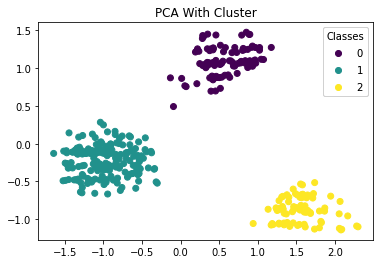

In [29]:
scaled_pca =  pd.DataFrame(pca_scaled)
scaled_pca.columns = ['PC1', 'PC2']

fig, ax = plt.subplots()
scatter = ax.scatter(scaled_pca['PC1'],scaled_pca['PC2'], c=cluster_df['Cluster'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
plt.title('PCA With Cluster')
plt.show()

In [30]:
df = df.set_index('Obs')
df.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
Obs,,,,,
1,3,2.645751,108,0,1
2,5,1.414214,99,0,1
3,3,1.527525,109,0,1
4,3,1.732051,101,0,1
5,9,3.055050,75,1,1


In [31]:
scaler = preprocessing.RobustScaler()
df_new = scaler.fit_transform(df)
df_new = pd.DataFrame(df_new)
df_new.columns = ['Number of Defect',	'Std. Dev Processing',	'%Completion',	'Perfectly Cut',	'Defect Type']
df_new.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type
0,-0.333333,-0.079321,0.962963,0.0,-0.5
1,0.000000,-0.510549,0.629630,0.0,-0.5
2,-0.333333,-0.470873,1.000000,0.0,-0.5
3,-0.333333,-0.399257,0.703704,0.0,-0.5
4,0.666667,0.063997,-0.259259,1.0,-0.5


In [32]:
pca = PCA(n_components=2)
pca.fit(df_new)
pca_scaled_1 = pca.fit_transform(df_new)

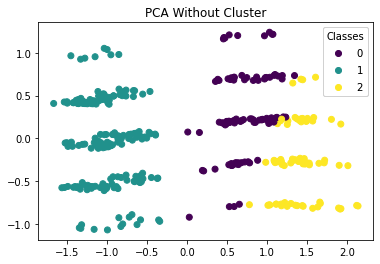

In [33]:
scaled_pca1 =  pd.DataFrame(pca_scaled_1)
scaled_pca1.columns = ['PC1', 'PC2']

fig, ax = plt.subplots()
scatter = ax.scatter(scaled_pca1['PC1'],scaled_pca1['PC2'], c=cluster_df['Cluster'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
plt.title('PCA Without Cluster')
plt.show()

In [34]:
pca = PCA(n_components=1)
pca.fit(robust_df)
pca_scaled = pca.fit_transform(robust_df)
scaled_pca =  pd.DataFrame(pca_scaled)
scaled_pca.columns = ['PC1']
scaled_pca.head()

,PC1
0,-0.963700
1,-0.901835
2,-1.206520
3,-1.042328
4,0.422698


In [35]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [36]:
pc1 = scaled_pca['PC1'].values.tolist()
n_steps = 30
X, y = prepare_data(pc1, n_steps)

In [37]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [38]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
11/11 [==============================] - 3s 30ms/step - loss: 1.1520
Epoch 2/300
11/11 [==============================] - 0s 30ms/step - loss: 1.1365
Epoch 3/300
11/11 [==============================] - 0s 30ms/step - loss: 1.1193
Epoch 4/300
11/11 [==============================] - 0s 29ms/step - loss: 1.1056
Epoch 5/300
11/11 [==============================] - 0s 29ms/step - loss: 1.1087
Epoch 6/300
11/11 [==============================] - 0s 29ms/step - loss: 1.1137
Epoch 7/300
11/11 [==============================] - 0s 30ms/step - loss: 1.1004
Epoch 8/300
11/11 [==============================] - 0s 29ms/step - loss: 1.1051
Epoch 9/300
11/11 [==============================] - 0s 31ms/step - loss: 1.1006
Epoch 10/300
11/11 [==============================] - 0s 30ms/step - loss: 1.1027
Epoch 11/300
11/11 [==============================] - 0s 31ms/step - loss: 1.0982
Epoch 12/300
11/11 [==============================] - 0s 30ms/step - loss: 1.1152
Epoch 13/300
11/11 [=====

In [39]:
input = pc1[-31:]
x_input = input
temp_input=list(x_input)
lst_output=[]
i=0
while(i<367):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

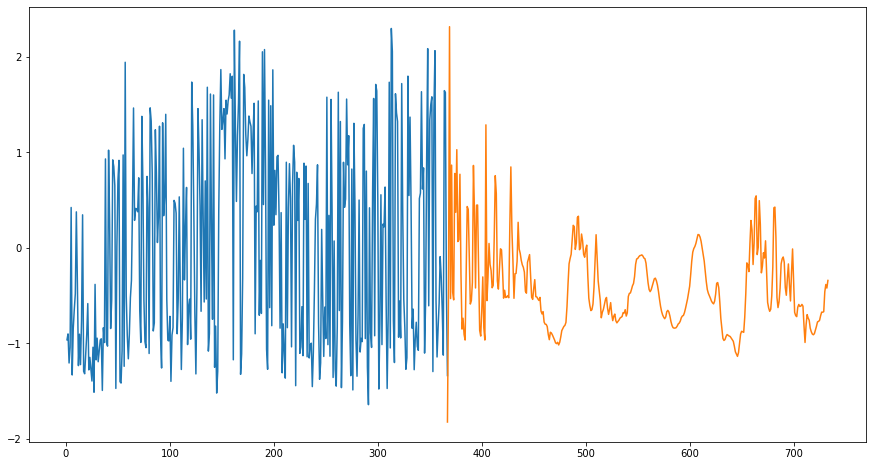

In [40]:
day_new=np.arange(1,368)
day_pred=np.arange(367,734)

plt.figure(figsize=(15,8))
plt.plot(day_new,pc1)
plt.plot(day_pred,lst_output)
plt.ticklabel_format(style = 'plain')

In [41]:
min(lst_output)

-1.82518

In [42]:
max(lst_output)

2.3168516

In [43]:
pred = pd.DataFrame(lst_output)
pred.columns = ['Prediction']
pred.head()

,Prediction
0,-1.825180
1,-0.484790
2,2.316852
3,-0.531732
4,0.866776


In [44]:
cldf = pd.read_excel('Clustered.xlsx')
cldf = cldf.set_index('Obs')
cldf.head()

,Number of Defect,Std. Dev Processing,%Completion,Perfectly Cut,Defect Type,Cluster
Obs,,,,,,
1,3,2.645751,108,0,1,1
2,5,1.414214,99,0,1,1
3,3,1.527525,109,0,1,1
4,3,1.732051,101,0,1,1
5,9,3.055050,75,1,1,0


In [45]:
X = cldf.drop('Cluster', axis=1)
Y = cldf['Cluster']

In [46]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [47]:
def baseline_model():
	model = Sequential()
	model.add(Dense(500, input_dim=5, activation='relu'))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [48]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=4, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)

In [49]:
results_keras = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results_keras.mean()*100, results_keras.std()*100))

Baseline: 97.26% (2.76%)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape) 
print(X_test.shape)

(256, 5)
(111, 5)


In [51]:
estimator.fit(X_train, y_train)

In [52]:
pred_train= estimator.predict(X)
scores = estimator.score(X, Y, verbose=0)
print(scores)

0.9591280817985535


In [53]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model.score(X_test, y_test)

0.972972972972973

In [55]:
results_LogReg = cross_val_score(model, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results_LogReg.mean()*100, results_LogReg.std()*100))

Baseline: 98.09% (1.74%)


In [56]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
results_GB = cross_val_score(clf, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results_GB.mean()*100, results_GB.std()*100))

Baseline: 97.55% (1.90%)


In [58]:
clf.score(X_test, y_test)

0.963963963963964

In [59]:
per = Perceptron()
per.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
results_per = cross_val_score(per, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results_per.mean()*100, results_per.std()*100))

Baseline: 77.72% (19.04%)


In [61]:
per.score(X_test, y_test)

0.7207207207207207

In [62]:
y_est = estimator.predict(X)
y_log = model.predict(X_test)
y_clf = clf.predict(X_test)
y_per = per.predict(X_test)

In [63]:
def accuracy(y_true, y_pred):
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [64]:
print(accuracy(Y, y_est))
print(accuracy(y_test, y_log))
print(accuracy(y_test, y_clf))
print(accuracy(y_test, y_per))

0.9591280653950953
0.972972972972973
0.963963963963964
0.7207207207207207
